In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel(r'/Users/azib/Documents/MSc_Thesis/SB9 Catalogue.xls',sheet_name=1)
pd.set_option('display.max_rows',None)

*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df.columns

Index(['name', 'ra', 'dec', 'app_mag_1', 'app_mag_1_band', 'spect_type_1',
       'period', 'period_error', 'ref_orbit', 'system_number', 'b1900_name',
       'lii', 'bii', 'component', 'app_mag_2', 'app_mag_2_band',
       'spect_type_2', 'alt_names', 'orbit_number', 'period_type',
       'reference_time', 'reference_time_type', 'reference_time_error',
       'reference_time_flag', 'eccentricity', 'eccentricity_type',
       'eccentricity_error', 'omega', 'omega_type', 'omega_error',
       'semi_amplitude_1', 'semi_amplitude_1_flag', 'semi_amplitude_1_type',
       'semi_amplitude_1_error', 'semi_amplitude_2', 'semi_amplitude_2_flag',
       'semi_amplitude_2_type', 'semi_amplitude_2_error', 'system_velocity',
       'system_velocity_flag', 'system_velocity_type', 'system_velocity_error',
       'radial_velocity_1_rms', 'radial_velocity_2_rms',
       'radial_velocity_1_obs', 'radial_velocity_2_obs', 'orbit_grade',
       'contributor', 'orbit_note', 'class'],
      dtype='object')

In [4]:
period_test = df[df['period'] > 100].index
period_test

df.drop(period_test,inplace=True)

In [5]:
period_log = np.log(df['period'])
df.insert(3,"log_period", period_log)

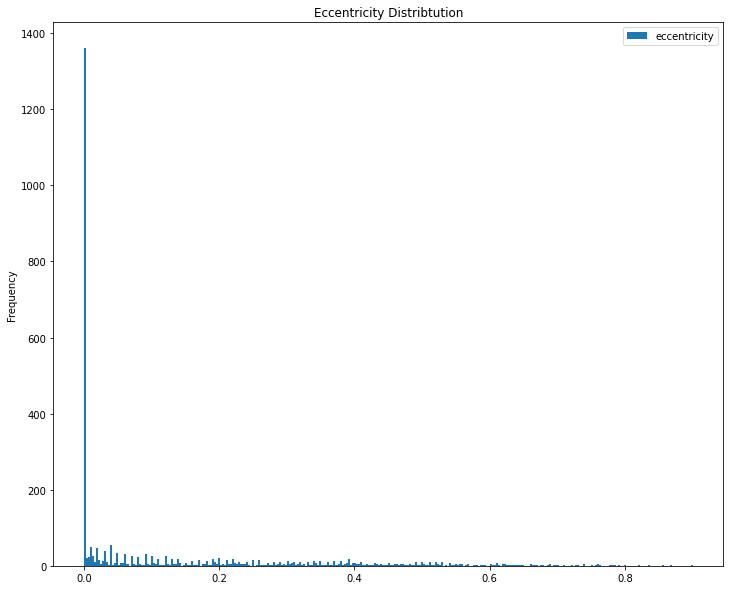

In [6]:
df.plot('log_period','eccentricity','hist', bins=300,figsize=(12,10),title='Eccentricity Distribtution')
plt.show()

---

In [7]:
# fig = df.hist(figsize=(100, 30))

In [8]:
import seaborn as sns

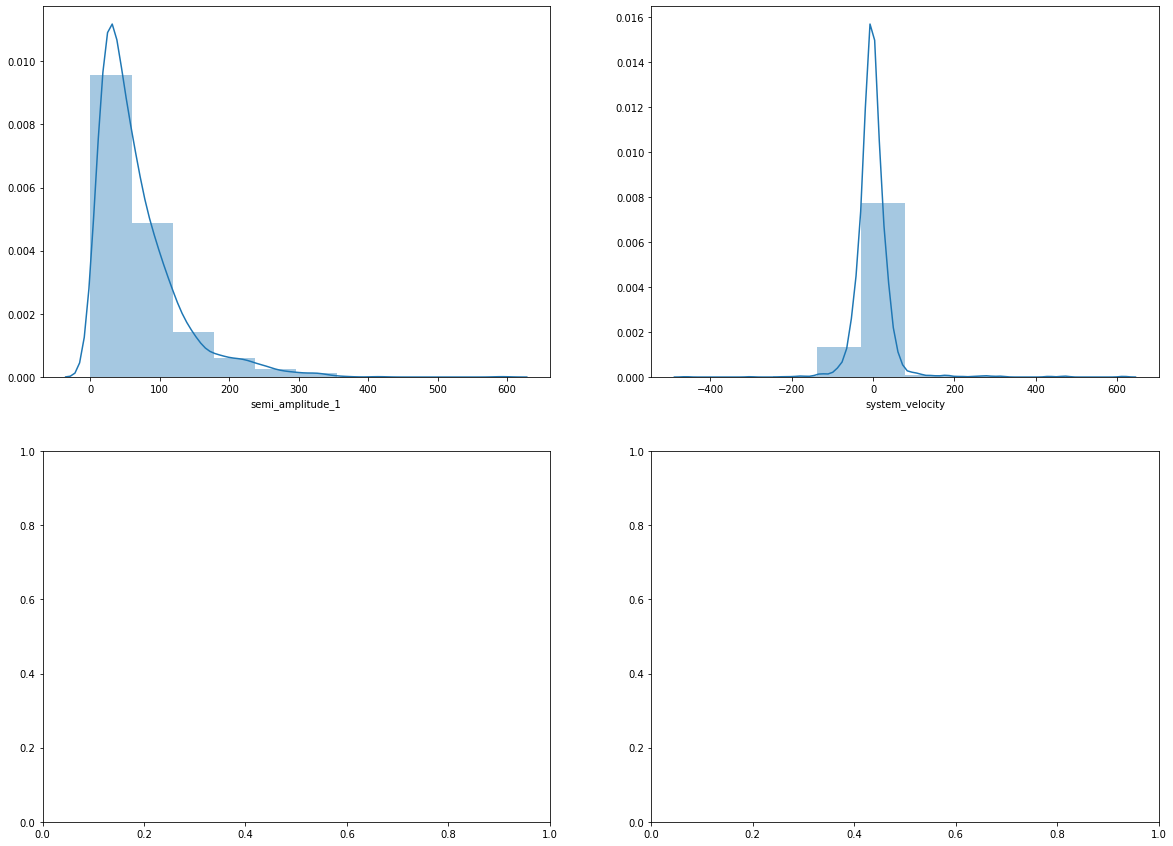

In [9]:
fig,ax = plt.subplots(2,2, figsize=(20,15))
sns.distplot(df['semi_amplitude_1'],bins=10,ax=ax[0,0])
sns.distplot(df['system_velocity'],bins = 10,ax=ax[0,1])
#sns.distplot(df['period'],bins = 10,ax=ax[1,0])
#sns.distplot(df['omega'],bins = 10,ax=ax[1,1])
plt.show()

In [10]:
K1 = pd.Series.to_numpy(df['semi_amplitude_1'])
P = pd.Series.to_numpy(df['period'])

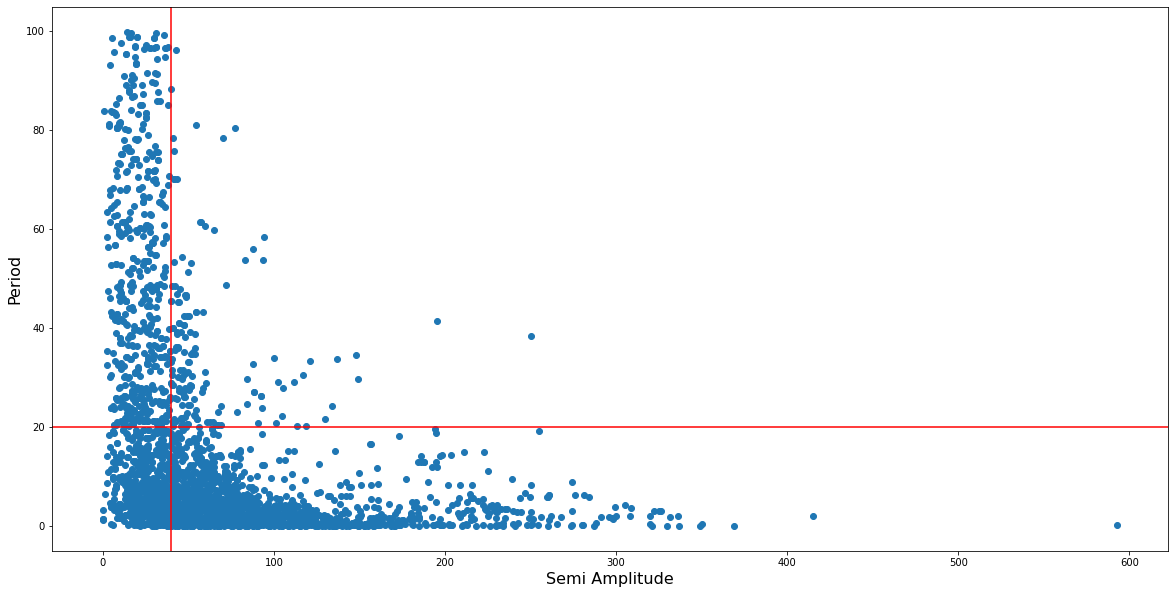

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(K1,P)
plt.xlabel('Semi Amplitude',fontsize=16)
plt.ylabel('Period',fontsize=16)
plt.axhline(y=20,color='r')
plt.axvline(x=40,color='r')
#plt.xscale('log')
#plt.yscale('log')

Referenced from pourbaix et al SB9 for period values - set polychord priors from 0 - 10000. 1000 for computational reasons